In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/nifty-indices-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty-indices-dataset/INDIAVIX.csv
/kaggle/input/nifty-indices-dataset/NIFTY BANK.csv
/kaggle/input/nifty-indices-dataset/NIFTY AUTO.csv
/kaggle/input/nifty-indices-dataset/NIFTY 50.csv
/kaggle/input/nifty-indices-dataset/NIFTY PHARMA.csv
/kaggle/input/nifty-indices-dataset/NIFTY FMCG.csv
/kaggle/input/nifty-indices-dataset/NIFTY MIDCAP 150.csv
/kaggle/input/nifty-indices-dataset/NIFTY NEXT 50.csv
/kaggle/input/nifty-indices-dataset/NIFTY IT.csv
/kaggle/input/nifty-indices-dataset/NIFTY SMALLCAP 250.csv
/kaggle/input/nifty-indices-dataset/NIFTY METAL.csv
/kaggle/input/nifty-indices-dataset/NIFTY 500.csv
/kaggle/input/nifty-indices-dataset/NIFTY 100.csv


# **Importing libraries**

In [2]:
#importing necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import math, random, statistics
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow.keras.optimizers, tensorflow.keras.initializers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Flatten, Input, Bidirectional, GRU
from tensorflow.keras.models import Sequential, Model
import datetime
import calendar

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Dataset from 03/01/2000 to 07/07/2021 except holidays
df=pd.read_csv("../input/nifty-indices-dataset/NIFTY 50.csv")
print("Dataset Shape:- ", df.shape)
df.head(15)

Dataset Shape:-  (5353, 10)


Date     Open     High      Low    Close    Volume      Turnover  \
0   2000-01-03  1482.15  1592.90  1482.15  1592.20  25358322  8.841500e+09   
1   2000-01-04  1594.40  1641.95  1594.40  1638.70  38787872  1.973690e+10   
2   2000-01-05  1634.55  1635.50  1555.05  1595.80  62153431  3.084790e+10   
3   2000-01-06  1595.80  1639.00  1595.80  1617.60  51272875  2.531180e+10   
4   2000-01-07  1616.60  1628.25  1597.20  1613.30  54315945  1.914630e+10   
5   2000-01-10  1615.65  1662.10  1614.95  1632.95  45013949  2.375350e+10   
6   2000-01-11  1633.25  1639.90  1548.25  1572.50  49120254  2.596950e+10   
7   2000-01-12  1572.30  1631.55  1571.70  1624.80  38364961  1.895000e+10   
8   2000-01-13  1627.85  1671.15  1613.65  1621.40  44738447  2.237610e+10   
9   2000-01-14  1622.15  1627.40  1591.40  1622.75  43292009  1.979980e+10   
10  2000-01-17  1623.50  1668.45  1604.65  1611.60  42683260  2.161590e+10   
11  2000-01-18  1611.65  1615.15  1587.85  1606.70  37564199  1.787350e+10   
12  2000-01-19  1610.05  1644.45  1608.85  1634.85  42981295  2.162920e+10   
13  2000-01-20  1634.65  1644.40  1596.65  1601.10  42625471  2.016770e+10   
14  2000-01-21  1601.25  1626.50  1593.20  1620.60  39715905  2.012480e+10   

      P/E   P/B  Div Yield  
0   25.91  4.63       0.95  
1   26.67  4.76       0.92  
2   25.97  4.64       0.95  
3   26.32  4.70       0.94  
4   26.25  4.69       0.94  
5   26.57  4.74       0.93  
6   25.59  4.57       0.96  
7   26.44  4.72       0.93  
8   26.38  4.71       0.93  
9   26.41  4.71       0.93  
10  26.22  4.68       0.94  
11  26.15  4.67       0.94  
12  26.60  4.75       0.93  
13  26.05  4.65       0.95  
14  26.37  4.71       0.93

In [4]:
df.describe()

Open          High           Low         Close        Volume  \
count   5353.000000   5353.000000   5353.000000   5353.000000  5.353000e+03   
mean    5639.363544   5676.576051   5594.238492   5636.173632  1.899654e+08   
std     3669.035585   3680.710632   3647.608681   3664.431037  1.733588e+08   
min      853.000000    877.000000    849.950000    854.200000  1.394931e+06   
25%     2080.000000   2098.000000   2062.550000   2080.500000  8.129548e+07   
50%     5233.650000   5277.250000   5196.350000   5232.200000  1.426366e+08   
75%     8331.850000   8376.750000   8273.350000   8328.350000  2.167622e+08   
max    15915.350000  15915.650000  15842.400000  15879.650000  1.811564e+09   

           Turnover          P/E          P/B    Div Yield  
count  5.353000e+03  5353.000000  5353.000000  5353.000000  
mean   8.291269e+10    20.725849     3.553936     1.419139  
std    8.291995e+10     5.137248     0.788623     0.395986  
min    4.012000e+08    10.680000     1.920000     0.590000  
25%    3.157850e+10    17.300000     3.040000     1.170000  
50%    6.107780e+10    20.380000     3.470000     1.330000  
75%    9.273390e+10    23.430000     3.820000     1.540000  
max    7.852293e+11    42.000000     6.550000     3.180000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5353 non-null   object 
 1   Open       5353 non-null   float64
 2   High       5353 non-null   float64
 3   Low        5353 non-null   float64
 4   Close      5353 non-null   float64
 5   Volume     5353 non-null   int64  
 6   Turnover   5353 non-null   float64
 7   P/E        5353 non-null   float64
 8   P/B        5353 non-null   float64
 9   Div Yield  5353 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 418.3+ KB


# **Correlation Matrix**

               Open      High       Low     Close    Volume  Turnover  \
Open       1.000000  0.999920  0.999886  0.999824  0.693971  0.789489   
High       0.999920  1.000000  0.999845  0.999915  0.696370  0.791538   
Low        0.999886  0.999845  1.000000  0.999908  0.690789  0.786890   
Close      0.999824  0.999915  0.999908  1.000000  0.693635  0.789374   
Volume     0.693971  0.696370  0.690789  0.693635  1.000000  0.918104   
Turnover   0.789489  0.791538  0.786890  0.789374  0.918104  1.000000   
P/E        0.822703  0.822980  0.822732  0.823097  0.591226  0.736488   
P/B        0.072078  0.073347  0.071605  0.072864 -0.097105  0.021066   
Div Yield -0.438132 -0.438712 -0.438237 -0.438653 -0.160462 -0.253116   

                P/E       P/B  Div Yield  
Open       0.822703  0.072078  -0.438132  
High       0.822980  0.073347  -0.438712  
Low        0.822732  0.071605  -0.438237  
Close      0.823097  0.072864  -0.438653  
Volume     0.591226 -0.097105  -0.160462  
Turnover   

/tmp/ipykernel_23/1623800446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
/tmp/ipykernel_23/1623800446.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), annot=True)


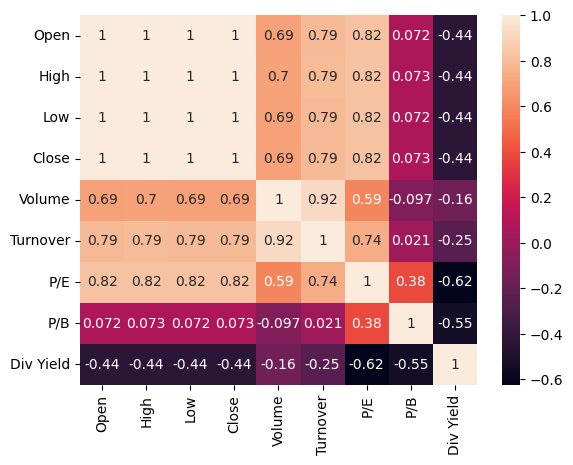

In [6]:
print(df.corr())
dataplot = sns.heatmap(df.corr(), annot=True)
plt.show()

#### **Here, target variable is selected to be High, among Turnover, P/E, P/B, Div Yield, Volume, P/E and Turnover are highly correlated to High, with P/E being slighty more correlated to High**

In [7]:
df.drop(['Volume', 'Turnover', 'P/B', 'Div Yield'], inplace=True, axis=1)
df=df[['Date', 'High', 'Low', 'Close', 'Open', 'P/E']]
df.head()

Date     High      Low   Close     Open    P/E
0  2000-01-03  1592.90  1482.15  1592.2  1482.15  25.91
1  2000-01-04  1641.95  1594.40  1638.7  1594.40  26.67
2  2000-01-05  1635.50  1555.05  1595.8  1634.55  25.97
3  2000-01-06  1639.00  1595.80  1617.6  1595.80  26.32
4  2000-01-07  1628.25  1597.20  1613.3  1616.60  26.25

In [8]:
#Calculating Average Close using 7 day average from Close feature
df.set_index('Date', inplace=True)

# Calculate the rolling average closing price for each 7-day period
df['Avg. Close']=df['Close'].rolling(window=7).mean()
df.head(10)

High      Low    Close     Open    P/E   Avg. Close
Date                                                              
2000-01-03  1592.90  1482.15  1592.20  1482.15  25.91          NaN
2000-01-04  1641.95  1594.40  1638.70  1594.40  26.67          NaN
2000-01-05  1635.50  1555.05  1595.80  1634.55  25.97          NaN
2000-01-06  1639.00  1595.80  1617.60  1595.80  26.32          NaN
2000-01-07  1628.25  1597.20  1613.30  1616.60  26.25          NaN
2000-01-10  1662.10  1614.95  1632.95  1615.65  26.57          NaN
2000-01-11  1639.90  1548.25  1572.50  1633.25  25.59  1609.007143
2000-01-12  1631.55  1571.70  1624.80  1572.30  26.44  1613.664286
2000-01-13  1671.15  1613.65  1621.40  1627.85  26.38  1611.192857
2000-01-14  1627.40  1591.40  1622.75  1622.15  26.41  1615.042857

In [9]:
#removing first 6 rows as they contain NAN values
df=df.iloc[6:]

In [10]:
#Now, the dataset contains data from 11/01/2000 to 07/07/2021

df.reset_index(inplace = True)
df.head(10)

Date     High      Low    Close     Open    P/E   Avg. Close
0  2000-01-11  1639.90  1548.25  1572.50  1633.25  25.59  1609.007143
1  2000-01-12  1631.55  1571.70  1624.80  1572.30  26.44  1613.664286
2  2000-01-13  1671.15  1613.65  1621.40  1627.85  26.38  1611.192857
3  2000-01-14  1627.40  1591.40  1622.75  1622.15  26.41  1615.042857
4  2000-01-17  1668.45  1604.65  1611.60  1623.50  26.22  1614.185714
5  2000-01-18  1615.15  1587.85  1606.70  1611.65  26.15  1613.242857
6  2000-01-19  1644.45  1608.85  1634.85  1610.05  26.60  1613.514286
7  2000-01-20  1644.40  1596.65  1601.10  1634.65  26.05  1617.600000
8  2000-01-21  1626.50  1593.20  1620.60  1601.25  26.37  1617.000000
9  2000-01-24  1645.00  1608.30  1613.60  1623.05  26.26  1615.885714

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5347 entries, 0 to 5346
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5347 non-null   object 
 1   High        5347 non-null   float64
 2   Low         5347 non-null   float64
 3   Close       5347 non-null   float64
 4   Open        5347 non-null   float64
 5   P/E         5347 non-null   float64
 6   Avg. Close  5347 non-null   float64
dtypes: float64(6), object(1)
memory usage: 292.5+ KB


# **Data Normalization**

In [12]:
cols = list(df)[1:]
df_for_training = df[cols].astype(float)
new_cols=['High', 'Low', 'Close', 'Open', 'P/E', 'Avg. Close']
df_for_training=df_for_training[new_cols]
df_for_training.head()

High      Low    Close     Open    P/E   Avg. Close
0  1639.90  1548.25  1572.50  1633.25  25.59  1609.007143
1  1631.55  1571.70  1624.80  1572.30  26.44  1613.664286
2  1671.15  1613.65  1621.40  1627.85  26.38  1611.192857
3  1627.40  1591.40  1622.75  1622.15  26.41  1615.042857
4  1668.45  1604.65  1611.60  1623.50  26.22  1614.185714

In [13]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
print(len(df_for_training_scaled))
df_for_training_scaled

5347


array([[-1.09817466, -1.11069263, -1.110414  , -1.09334652,  0.94823448,
        -1.10058613],
       [-1.10044372, -1.10426238, -1.09613868, -1.10996212,  1.11372433,
        -1.09931229],
       [-1.08968267, -1.09275922, -1.09706671, -1.09481862,  1.10204269,
        -1.09998828],
       ...,
       [ 2.76223152,  2.78689058,  2.78236739,  2.76685605,  1.52063466,
         2.77246466],
       [ 2.78077803,  2.79757111,  2.77797288,  2.77240367,  1.51479384,
         2.7708196 ],
       [ 2.77516653,  2.79173041,  2.79473205,  2.77399844,  1.53815711,
         2.77335752]])

#### **Converting the dataset into time series of 14 units and splitting it into training and testing data, 25% of the dataset will be used in testing i.e. last 1300 data samples**

In [14]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

trainX=[]
trainY=[]

for i in range(n_past, 4041 - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    
    
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4027, 14, 6).
trainY shape == (4027, 1).


In [15]:
testX=[]
testY=[]

for i in range(4061, 5347 - n_future +1):
    testX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    testY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    
testX, testY = np.array(testX, dtype=object), np.array(testY, dtype=object)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (1286, 14, 6).
testY shape == (1286, 1).


# **Long Short Term Memory**

## **Training Phase**

In [16]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            18176     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
114/114 [==============================] - 14s 61ms/step - loss: 0.0368 - val_loss: 0.0111
Epoch 2/100
114/114 [==============================] - 7s 59ms/step - loss: 0.0168 - val_loss: 0.0041
Epoch 3/100
114/114 [==============================] - 8s 67ms/step - loss: 0.0148 - val_loss: 0.0028
Epoch 4/100
114/114 [==============================] - 7s 60ms/step - loss: 0.0127 - val_loss: 0.0241
Epoch 5/100
114/114 [==============================] - 7s 60ms/step - loss: 0.0129 - val_loss: 0.0031
Epoch 6/100
114/114 [==============================] - 7s 58ms/step - loss: 0.0113 - val_loss: 0.0178
Epoch 7/100
114/114 [==============================] - 7s 58ms/step - loss: 0.0112 - val_loss: 0.0017
Epoch 8/100
114/114 [==============================] - 8s 67ms/step - loss: 0.0113 - val_loss: 0.0028
Epoch 9/100
114/114 [==============================] - 7s 58ms/step - loss: 0.0111 - val_loss: 9.8920e-04
Epoch 10/100
114/114 [==============================] - 7s 61ms/step - loss: 

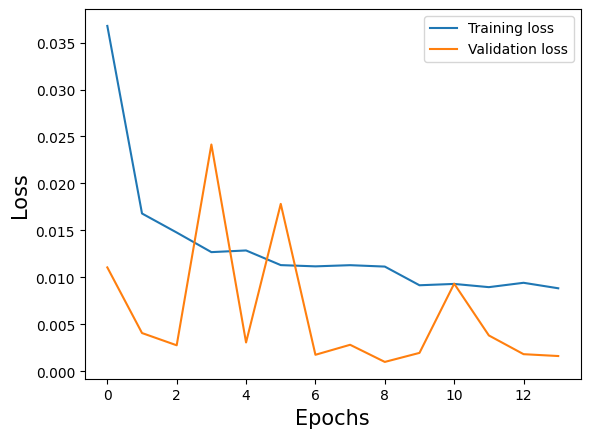

In [17]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)

history = model.fit(trainX, trainY, batch_size=32, epochs=100, callbacks=[earlystopping], validation_split=0.1)
# validation set 10% of training set
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()

## **Testing Phase**

In [18]:
type(trainX[0])

numpy.ndarray

In [19]:
testX = np.asarray(testX).astype('float32') # to avoid Failed to convert a NumPy array to a Tensor (Unsupported object type float)
prediction = model.predict(testX)
#Perform inverse transformation to rescale back to original range
#Since we used 6 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 6 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
print(y_pred_future)
len(y_pred_future)

41/41 [==============================] - 1s 6ms/step
[ 7950.119  7931.516  7911.131 ... 16809.    16892.945 16956.938]


1286

# **Evaluation Metrics**

### **1. Mean Squared Error**                                                                                           
### **2. Root Mean Squared Error**

In [20]:
scaler = scaler.fit(testY)
testY_transformed = scaler.transform(testY)

import math

def mean_squared_error(original, predicted, n):
    sum=0
    for i, j in zip(original, predicted):
        sum=sum+(i-j)**2
    sum=sum/n
    return sum

mse=mean_squared_error(testY_transformed, prediction, len(testY))
print("Mean Squared Error:- ", mse)
print("Root Mean Squared Error:- ", math.sqrt(mse))

Mean Squared Error:-  [2.16747706]
Root Mean Squared Error:-  1.4722353947550348


In [21]:
df_for_training.tail(20)

High       Low     Close      Open    P/E    Avg. Close
5327  15751.25  15648.50  15737.75  15692.10  29.18  15685.950000
5328  15835.55  15749.80  15799.35  15796.45  29.30  15717.828571
5329  15823.05  15606.50  15811.85  15791.40  29.32  15735.185714
5330  15901.60  15842.40  15869.25  15866.95  29.43  15763.614286
5331  15880.85  15742.60  15767.55  15847.50  29.24  15765.885714
5332  15769.35  15616.75  15691.40  15648.30  29.10  15758.928571
5333  15761.50  15450.90  15683.35  15756.50  29.08  15765.785714
5334  15765.15  15505.65  15746.50  15525.85  29.19  15767.035714
5335  15895.75  15752.10  15772.75  15840.50  29.05  15763.235714
5336  15862.95  15673.95  15686.95  15862.80  28.89  15745.392857
5337  15821.40  15702.70  15790.45  15737.30  29.08  15734.135714
5338  15870.80  15772.30  15860.35  15839.35  29.21  15747.392857
5339  15915.65  15792.15  15814.70  15915.35  29.12  15765.007143
5340  15835.90  15724.05  15748.45  15807.50  29.00  15774.307143
5341  15839.10  15708.75  15721.50  15776.90  28.33  15770.735714
5342  15755.55  15667.05  15680.00  15755.05  28.26  15757.485714
5343  15738.35  15635.95  15722.20  15705.85  28.33  15762.521429
5344  15845.95  15762.05  15834.35  15793.40  28.53  15768.792857
5345  15914.20  15801.00  15818.25  15813.75  28.50  15762.778571
5346  15893.55  15779.70  15879.65  15819.60  28.62  15772.057143

In [22]:
forecast_dates = []
for i in range(5336, 5347):
    forecast_dates.append(df.loc[i, 'Date'])

print(forecast_dates)
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'High':y_pred_future[-11:]})

df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

original = df[['Date', 'High']]
original['Date']=pd.to_datetime(original['Date'])
original = original[(original['Date'] >= '2021-06-23') & (original['Date'] <= '2021-07-07')]

print(original.dtypes)
print(df_forecast.dtypes)

['2021-06-23', '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06', '2021-07-07']
Date    datetime64[ns]
High           float64
dtype: object
Date    datetime64[ns]
High           float32
dtype: object


/tmp/ipykernel_23/4000519088.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


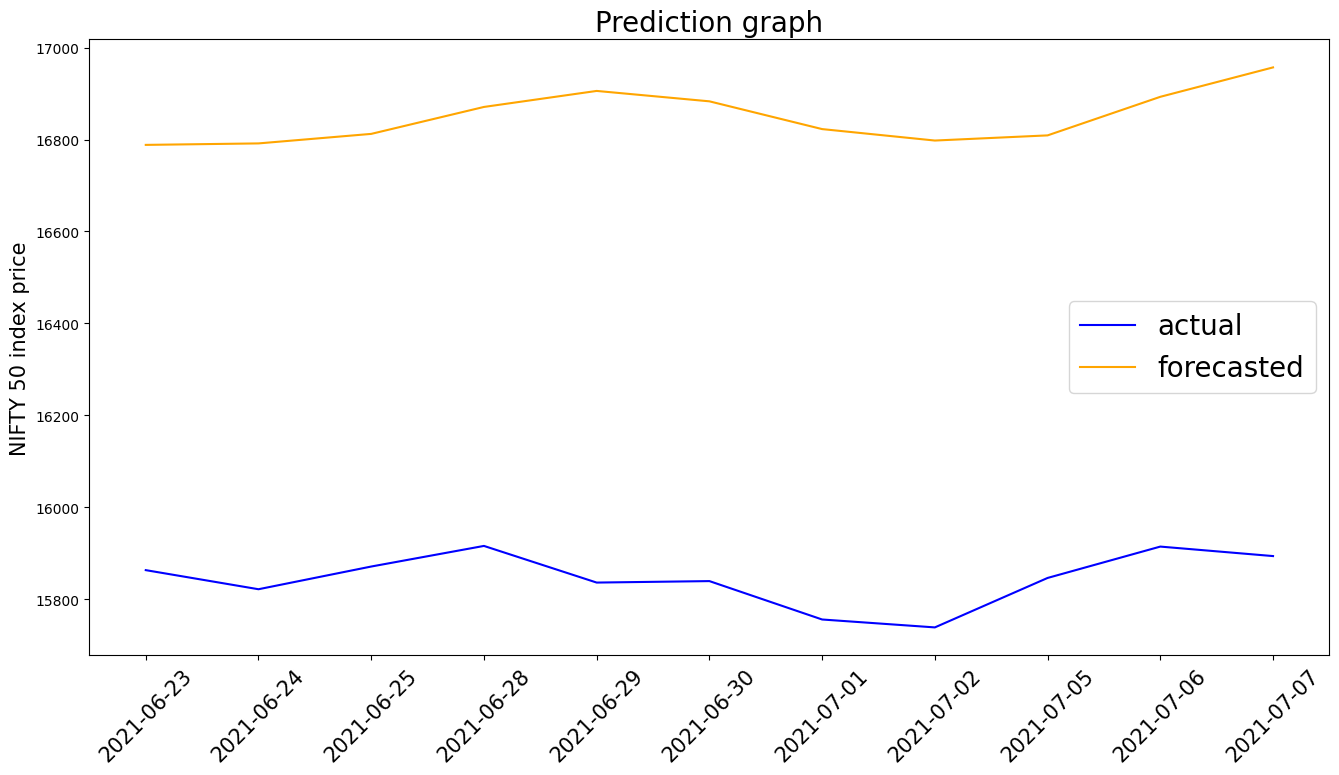

In [23]:
plt.figure(figsize=(16,8))
plt.plot(forecast_dates, original['High'], color='blue')
plt.plot(forecast_dates, df_forecast['High'], color='orange')
plt.xticks(rotation=45, fontsize=15)
plt.title('Prediction graph', fontsize=20)
plt.ylabel('NIFTY 50 index price', fontsize=15)
plt.legend(['actual', 'forecasted'], fontsize=20)

# **Explainability using LIME**

In [24]:
from lime import lime_tabular

explain=lime_tabular.RecurrentTabularExplainer(trainX, mode='regression', feature_names=cols, verbose=True)

In [25]:
len(testX)

1286

In [26]:
exp_lime=explain.explain_instance(testX[1210], model.predict)
exp_lime.show_in_notebook()

157/157 [==============================] - 1s 6ms/step
Intercept -0.4497917272293121
Prediction_local [-0.01317772]
Right: 1.6576214


In [27]:
exp_lime=explain.explain_instance(testX[1100], model.predict)
exp_lime.show_in_notebook()

157/157 [==============================] - 1s 7ms/step
Intercept -0.4424113503298336
Prediction_local [-0.03546578]
Right: 1.3680825


## **Month wise explanation**

In [28]:
#converting date to month+year

import calendar

df_with_dates=df.copy()

df_with_dates['month-with-year']=''

for index in df_with_dates.index:
    day=str(df_with_dates['Date'][index])
    year=day[:4]
    month=calendar.month_name[int(day[5:7])]
    val=month+str(', ')+year
    df_with_dates['month-with-year'][index]=val

df_with_dates.drop(['Date'], inplace=True, axis='columns')
print(df_with_dates.to_string())

/tmp/ipykernel_23/1769193129.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_dates['month-with-year'][index]=val


          High       Low     Close      Open    P/E    Avg. Close  month-with-year
0      1639.90   1548.25   1572.50   1633.25  25.59   1609.007143    January, 2000
1      1631.55   1571.70   1624.80   1572.30  26.44   1613.664286    January, 2000
2      1671.15   1613.65   1621.40   1627.85  26.38   1611.192857    January, 2000
3      1627.40   1591.40   1622.75   1622.15  26.41   1615.042857    January, 2000
4      1668.45   1604.65   1611.60   1623.50  26.22   1614.185714    January, 2000
5      1615.15   1587.85   1606.70   1611.65  26.15   1613.242857    January, 2000
6      1644.45   1608.85   1634.85   1610.05  26.60   1613.514286    January, 2000
7      1644.40   1596.65   1601.10   1634.65  26.05   1617.600000    January, 2000
8      1626.50   1593.20   1620.60   1601.25  26.37   1617.000000    January, 2000
9      1645.00   1608.30   1613.60   1623.05  26.26   1615.885714    January, 2000
10     1613.65   1579.55   1586.40   1612.95  25.81   1610.692857    January, 2000
11  

In [29]:
dict_for_month_and_year={}
for index in df_with_dates.index:
    date=str(df_with_dates['month-with-year'][index])
    if date in dict_for_month_and_year:
        dict_for_month_and_year[date]+=1
    else:
        dict_for_month_and_year[date]=1
        
dict_for_month_and_year

{'January, 2000': 14,
 'February, 2000': 21,
 'March, 2000': 21,
 'April, 2000': 18,
 'May, 2000': 22,
 'June, 2000': 22,
 'July, 2000': 21,
 'August, 2000': 22,
 'September, 2000': 20,
 'October, 2000': 21,
 'November, 2000': 22,
 'December, 2000': 20,
 'January, 2001': 22,
 'February, 2001': 20,
 'March, 2001': 21,
 'April, 2001': 19,
 'May, 2001': 22,
 'June, 2001': 21,
 'July, 2001': 22,
 'August, 2001': 21,
 'September, 2001': 20,
 'October, 2001': 21,
 'November, 2001': 20,
 'December, 2001': 19,
 'January, 2002': 23,
 'February, 2002': 20,
 'March, 2002': 19,
 'April, 2002': 22,
 'May, 2002': 22,
 'June, 2002': 20,
 'July, 2002': 23,
 'August, 2002': 21,
 'September, 2002': 20,
 'October, 2002': 21,
 'November, 2002': 19,
 'December, 2002': 21,
 'January, 2003': 23,
 'February, 2003': 19,
 'March, 2003': 20,
 'April, 2003': 20,
 'May, 2003': 21,
 'June, 2003': 21,
 'July, 2003': 23,
 'August, 2003': 20,
 'September, 2003': 22,
 'October, 2003': 23,
 'November, 2003': 20,
 'Decem

In [30]:
#normalized data with dates grouping

df_scaled_with_dates=pd.DataFrame({'High': df_for_training_scaled[:, 0], 'Low': df_for_training_scaled[:, 1], 'Close': df_for_training_scaled[:, 2], 
                                  'Open': df_for_training_scaled[:, 3], 'P/E': df_for_training_scaled[:, 4], 'Avg. Close': df_for_training_scaled[:, 5]})

df_scaled_with_dates['month-with-year']=df_with_dates['month-with-year']
df_scaled_with_dates.to_excel("data_with_dates.xlsx")
print(df_scaled_with_dates.to_string())

          High       Low     Close      Open       P/E  Avg. Close  month-with-year
0    -1.098175 -1.110693 -1.110414 -1.093347  0.948234   -1.100586    January, 2000
1    -1.100444 -1.104262 -1.096139 -1.109962  1.113724   -1.099312    January, 2000
2    -1.089683 -1.092759 -1.097067 -1.094819  1.102043   -1.099988    January, 2000
3    -1.101571 -1.098860 -1.096698 -1.096372  1.107884   -1.098935    January, 2000
4    -1.090416 -1.095227 -1.099742 -1.096004  1.070892   -1.099170    January, 2000
5    -1.104900 -1.099834 -1.101079 -1.099235  1.057263   -1.099428    January, 2000
6    -1.096938 -1.094075 -1.093396 -1.099671  1.144875   -1.099353    January, 2000
7    -1.096952 -1.097421 -1.102608 -1.092965  1.037794   -1.098236    January, 2000
8    -1.101816 -1.098367 -1.097285 -1.102070  1.100096   -1.098400    January, 2000
9    -1.096789 -1.094226 -1.099196 -1.096127  1.078679   -1.098705    January, 2000
10   -1.105308 -1.102110 -1.106620 -1.098881  0.991067   -1.100125    Januar

# **2003(a good year) and 2008(market crash) and 2020(market crash)**

### **June, August, September and October**

## **2003**

In [31]:
dict_for_months_2003={}

for i in range(1, 13): 
    temp='df_for_'
    var=calendar.month_name[i]
    temp=temp+str(var)
    var=var+', 2003'
    dict_for_months_2003[temp]=df_scaled_with_dates[df_scaled_with_dates['month-with-year']==var]
    
dict_for_months_2003['df_for_June']

High       Low     Close      Open       P/E  Avg. Close  \
846 -1.266493 -1.259740 -1.262543 -1.264110 -1.777481   -1.269409   
847 -1.267471 -1.258931 -1.263771 -1.261642 -1.787215   -1.267739   
848 -1.265881 -1.258259 -1.260933 -1.263060 -1.763852   -1.266231   
849 -1.261656 -1.255243 -1.257111 -1.260225 -1.732701   -1.263957   
850 -1.258789 -1.251171 -1.254013 -1.256108 -1.707391   -1.261784   
851 -1.256561 -1.250102 -1.252458 -1.253437 -1.695709   -1.259850   
852 -1.256696 -1.251719 -1.256361 -1.251801 -1.726860   -1.258638   
853 -1.258952 -1.251432 -1.254641 -1.255618 -1.713232   -1.257507   
854 -1.257770 -1.249210 -1.252676 -1.253928 -1.697656   -1.255919   
855 -1.255908 -1.247058 -1.251338 -1.252087 -1.685974   -1.254545   
856 -1.255813 -1.248539 -1.252539 -1.250575 -1.695709   -1.253891   
857 -1.249454 -1.246688 -1.244310 -1.251719 -1.629513   -1.252502   
858 -1.246737 -1.238845 -1.243000 -1.243405 -1.617832   -1.251148   
859 -1.245704 -1.239394 -1.241417 -1.242546 -1.606150   -1.249008   
860 -1.244454 -1.238722 -1.239315 -1.240720 -1.588628   -1.246814   
861 -1.243218 -1.236994 -1.242331 -1.238552 -1.611991   -1.245333   
862 -1.246886 -1.239339 -1.243382 -1.241660 -1.621725   -1.244194   
863 -1.242240 -1.237899 -1.237568 -1.242628 -1.573052   -1.242051   
864 -1.239753 -1.231743 -1.234920 -1.236862 -1.551636   -1.240707   
865 -1.237606 -1.231044 -1.232409 -1.233959 -1.532166   -1.239191   
866 -1.233666 -1.226615 -1.230062 -1.231737 -1.512697   -1.237565   

    month-with-year  
846      June, 2003  
847      June, 2003  
848      June, 2003  
849      June, 2003  
850      June, 2003  
851      June, 2003  
852      June, 2003  
853      June, 2003  
854      June, 2003  
855      June, 2003  
856      June, 2003  
857      June, 2003  
858      June, 2003  
859      June, 2003  
860      June, 2003  
861      June, 2003  
862      June, 2003  
863      June, 2003  
864      June, 2003  
865      June, 2003  
866      June, 2003

## **June**

In [32]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

trainX_June=[]

df_for_June=dict_for_months_2003['df_for_June'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_June)

for i in range(n_past, len(df_for_June) - n_future +1):
    trainX_June.append(df_for_June[i - n_past:i, 0:df_for_June.shape[1]])
    
print("\ntrainX June shape:-", np.array(trainX_June).shape)

[[-1.26649278 -1.25974013 -1.26254305 -1.26410961 -1.77748064 -1.26940947]
 [-1.26747106 -1.25893121 -1.26377133 -1.26164248 -1.78721534 -1.26773901]
 [-1.26588135 -1.25825939 -1.26093264 -1.26306006 -1.76385207 -1.26623072]
 [-1.26165574 -1.25524306 -1.25711133 -1.26022491 -1.73270104 -1.26395656]
 [-1.25878884 -1.25117103 -1.25401334 -1.25610849 -1.70739082 -1.26178399]
 [-1.25656054 -1.2501016  -1.25245753 -1.25343691 -1.69570919 -1.25984978]
 [-1.25669641 -1.25171945 -1.25636072 -1.25180125 -1.72686022 -1.25863845]
 [-1.25895189 -1.25143153 -1.25464113 -1.25561779 -1.71323164 -1.25750724]
 [-1.2577698  -1.24921042 -1.25267589 -1.25392761 -1.69765613 -1.25591884]
 [-1.25590836 -1.24705786 -1.25133843 -1.25208749 -1.68597449 -1.25454535]
 [-1.25581325 -1.2485386  -1.25253941 -1.2505745  -1.69570919 -1.25389085]
 [-1.24945444 -1.24668767 -1.24430995 -1.25171947 -1.62951325 -1.25250173]
 [-1.246737   -1.23884523 -1.24299978 -1.24340485 -1.61783161 -1.25114779]
 [-1.24570438 -1.23939366

In [33]:
# for i in range(7):
#     exp_lime=explain.explain_instance(trainX_June[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **August**

In [34]:
trainX_August=[]

df_for_August=dict_for_months_2003['df_for_August'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_August)

for i in range(n_past, len(df_for_August) - n_future +1):
    trainX_August.append(df_for_August[i - n_past:i, 0:df_for_August.shape[1]])
    
print("\ntrainX August shape:-", np.array(trainX_August).shape)

[[-1.21804086 -1.21158864 -1.21324816 -1.21532599 -1.51269689 -1.21985461]
 [-1.21605713 -1.21003935 -1.2111055  -1.21253174 -1.45234177 -1.21734795]
 [-1.2126875  -1.21139669 -1.21633251 -1.21039175 -1.49322749 -1.21650002]
 [-1.22014687 -1.21585262 -1.21999004 -1.21578943 -1.52243158 -1.21642774]
 [-1.21779629 -1.21420736 -1.21292062 -1.21942878 -1.46597034 -1.21556027]
 [-1.21105704 -1.20626894 -1.20590579 -1.21153671 -1.41145604 -1.21401095]
 [-1.2067499  -1.20186785 -1.20312169 -1.20529394 -1.39003971 -1.21217443]
 [-1.20430421 -1.19801519 -1.20260309 -1.20219981 -1.38419889 -1.2106505 ]
 [-1.20430421 -1.19815229 -1.19928674 -1.20181815 -1.35888868 -1.20895856]
 [-1.20131502 -1.19428591 -1.19905473 -1.19864224 -1.35694174 -1.20648511]
 [-1.19442632 -1.19305196 -1.18986994 -1.1983969  -1.28490498 -1.20217319]
 [-1.18847513 -1.1875129  -1.19087986 -1.18799681 -1.29269274 -1.19901789]
 [-1.19245618 -1.18403041 -1.18823223 -1.18942802 -1.2712764  -1.19648779]
 [-1.18941265 -1.18233031

In [35]:
# for i in range(6):
#     exp_lime=explain.explain_instance(trainX_August[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **September**

In [36]:
trainX_September=[]

df_for_September=dict_for_months_2003['df_for_September'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_September)

for i in range(n_past, len(df_for_September) - n_future +1):
    trainX_September.append(df_for_September[i - n_past:i, 0:df_for_September.shape[1]])
    
print("\ntrainX September shape:-", np.array(trainX_September).shape)

[[-1.16896392 -1.16323149 -1.16406245 -1.1687369  -1.08242328 -1.17673344]
 [-1.16636877 -1.16042083 -1.16146942 -1.16348915 -1.06100695 -1.17383018]
 [-1.16473831 -1.16406784 -1.16859343 -1.16042228 -1.11746819 -1.17038181]
 [-1.16809434 -1.16346457 -1.16494954 -1.16813715 -1.0882641  -1.16825223]
 [-1.16312143 -1.15881669 -1.15793471 -1.16429335 -1.0337498  -1.16598197]
 [-1.15786319 -1.15179689 -1.1527623  -1.15736905 -0.99286407 -1.16300055]
 [-1.15502347 -1.15198884 -1.15557369 -1.15208041 -1.01622735 -1.16102727]
 [-1.15953441 -1.15418253 -1.15489131 -1.1550246  -1.01038653 -1.15971435]
 [-1.15727894 -1.15145412 -1.1566382  -1.15430218 -1.0240151  -1.15902272]
 [-1.15911321 -1.16035228 -1.16511331 -1.15541988 -1.09021104 -1.15852452]
 [-1.17101559 -1.17255468 -1.17680925 -1.16463411 -1.18171719 -1.16022232]
 [-1.17366509 -1.17890267 -1.16897557 -1.1759747  -1.12136207 -1.1618029 ]
 [-1.16949382 -1.16993596 -1.17343831 -1.16839613 -1.15640698 -1.16476283]
 [-1.1789641  -1.17897122

In [37]:
# for i in range(8):
#     exp_lime=explain.explain_instance(trainX_September[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **October**

In [38]:
trainX_October=[]

df_for_October=dict_for_months_2003['df_for_October'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_October)

for i in range(n_past, len(df_for_October) - n_future +1):
    trainX_October.append(df_for_October[i - n_past:i, 0:df_for_October.shape[1]])
    
print("\ntrainX October shape:-", np.array(trainX_October).shape)

[[-1.15496912 -1.14916446 -1.15180697 -1.15240754 -0.98507632 -1.16235386]
 [-1.14945272 -1.14562714 -1.14404152 -1.15124895 -0.92472119 -1.15762188]
 [-1.14134117 -1.14483192 -1.13596218 -1.14345229 -0.8604722  -1.15344673]
 [-1.13661282 -1.13276663 -1.13624878 -1.13541029 -0.86436607 -1.14873233]
 [-1.13808024 -1.13472724 -1.13604407 -1.13571016 -0.86241913 -1.14515111]
 [-1.13481931 -1.12984628 -1.12962973 -1.13298406 -0.81179871 -1.14115961]
 [-1.1287866  -1.12252484 -1.12389776 -1.12773631 -0.76701911 -1.13701766]
 [-1.12235986 -1.11952223 -1.11744248 -1.12330639 -0.71639868 -1.13209813]
 [-1.11911252 -1.12015291 -1.12452555 -1.11639572 -0.77091298 -1.12930427]
 [-1.12427565 -1.12310069 -1.12010375 -1.12382435 -0.73586808 -1.12703401]
 [-1.11896306 -1.11369524 -1.11499957 -1.11950348 -0.69692929 -1.12399203]
 [-1.1160554  -1.1096232  -1.1112465  -1.11189765 -0.6677252  -1.12044207]
 [-1.1160554  -1.11391461 -1.11854793 -1.1106709  -0.72418644 -1.11885562]
 [-1.12269954 -1.12475966

In [39]:
# for i in range(9):
#     exp_lime=explain.explain_instance(trainX_October[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **2008**

In [40]:
dict_for_months_2008={}

for i in range(1, 13):
    temp='df_for_'
    var=calendar.month_name[i]
    temp=temp+str(var)
    var=var+', 2008'
    dict_for_months_2008[temp]=df_scaled_with_dates[df_scaled_with_dates['month-with-year']==var]
    
dict_for_months_2008['df_for_June']

High       Low     Close      Open       P/E  Avg. Close  \
2103 -0.209871 -0.242883 -0.245952 -0.211180 -0.107007   -0.210392   
2104 -0.255932 -0.264545 -0.252421 -0.246605 -0.126476   -0.219405   
2105 -0.258051 -0.283603 -0.287986 -0.252221 -0.233558   -0.230715   
2106 -0.269166 -0.291350 -0.263052 -0.288138 -0.157627   -0.237860   
2107 -0.254030 -0.269961 -0.276468 -0.262621 -0.198513   -0.249213   
2108 -0.286598 -0.325530 -0.311092 -0.277369 -0.303648   -0.262278   
2109 -0.314832 -0.336992 -0.325053 -0.305844 -0.346480   -0.278701   
2110 -0.309805 -0.310051 -0.304909 -0.320115 -0.286125   -0.287141   
2111 -0.307373 -0.330905 -0.300610 -0.305189 -0.272497   -0.294040   
2112 -0.303745 -0.303662 -0.306683 -0.301073 -0.290019   -0.296717   
2113 -0.288976 -0.291336 -0.291562 -0.301945 -0.245239   -0.300798   
2114 -0.276381 -0.284357 -0.269589 -0.292077 -0.161521   -0.299813   
2115 -0.272114 -0.282122 -0.288860 -0.270186 -0.217982   -0.296631   
2116 -0.297672 -0.304320 -0.310191 -0.289337 -0.284178   -0.294503   
2117 -0.312264 -0.346918 -0.352962 -0.310696 -0.414623   -0.301382   
2118 -0.361409 -0.376561 -0.375112 -0.352419 -0.480819   -0.312048   
2119 -0.373706 -0.395591 -0.395665 -0.374255 -0.547015   -0.324786   
2120 -0.384942 -0.412839 -0.378865 -0.396459 -0.494448   -0.337284   
2121 -0.368583 -0.375327 -0.361615 -0.379285 -0.441880   -0.350458   
2122 -0.371151 -0.405709 -0.410528 -0.362192 -0.593742   -0.367876   
2123 -0.412538 -0.432445 -0.436758 -0.411003 -0.669672   -0.385995   

     month-with-year  
2103      June, 2008  
2104      June, 2008  
2105      June, 2008  
2106      June, 2008  
2107      June, 2008  
2108      June, 2008  
2109      June, 2008  
2110      June, 2008  
2111      June, 2008  
2112      June, 2008  
2113      June, 2008  
2114      June, 2008  
2115      June, 2008  
2116      June, 2008  
2117      June, 2008  
2118      June, 2008  
2119      June, 2008  
2120      June, 2008  
2121      June, 2008  
2122      June, 2008  
2123      June, 2008

## **June**

In [41]:
trainX_June=[]

df_for_June=dict_for_months_2008['df_for_June'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_June)

for i in range(n_past, len(df_for_June) - n_future +1):
    trainX_June.append(df_for_June[i - n_past:i, 0:df_for_June.shape[1]])
    
print("\ntrainX June shape:-", np.array(trainX_June).shape)

[[-0.20987131 -0.24288272 -0.24595196 -0.21117963 -0.10700666 -0.21039226]
 [-0.25593189 -0.26454541 -0.25242089 -0.24660534 -0.12647605 -0.2194049 ]
 [-0.25805149 -0.28360308 -0.28798636 -0.25222111 -0.23355772 -0.23071514]
 [-0.26916581 -0.29134955 -0.26305232 -0.28813751 -0.15762708 -0.23786   ]
 [-0.25402968 -0.26996108 -0.27646785 -0.26262119 -0.19851281 -0.24921322]
 [-0.28659818 -0.32552998 -0.31109164 -0.27736941 -0.30364753 -0.26227794]
 [-0.31483236 -0.33699201 -0.32505306 -0.30584355 -0.3464802  -0.27870114]
 [-0.3098051  -0.31005075 -0.3049093  -0.3201147  -0.28612508 -0.28714133]
 [-0.30737299 -0.33090452 -0.30061033 -0.30518929 -0.2724965  -0.29404001]
 [-0.30374521 -0.30366163 -0.30668348 -0.30107287 -0.29001896 -0.29671665]
 [-0.28897594 -0.29133584 -0.29156202 -0.30194522 -0.24523935 -0.30079802]
 [-0.27638061 -0.28435716 -0.26958949 -0.29207673 -0.16152096 -0.29981334]
 [-0.27211423 -0.28212234 -0.28885981 -0.27018613 -0.2179822  -0.29663068]
 [-0.29767174 -0.30431974

In [42]:
# for i in range(7):
#     exp_lime=explain.explain_instance(trainX_June[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **August**

In [43]:
trainX_August=[]

df_for_August=dict_for_months_2008['df_for_August'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_August)

for i in range(n_past, len(df_for_August) - n_future +1):
    trainX_August.append(df_for_August[i - n_past:i, 0:df_for_August.shape[1]])
    
print("\ntrainX August shape:-", np.array(trainX_August).shape)

[[-0.34189804 -0.37376373 -0.33494752 -0.35774855 -0.4204639  -0.35564754]
 [-0.33831103 -0.33888406 -0.33991523 -0.33198688 -0.42435778 -0.3571402 ]
 [-0.31684327 -0.3352919  -0.31057303 -0.34024697 -0.3367455  -0.34967688]
 [-0.28946508 -0.30022028 -0.30656066 -0.31013716 -0.32506387 -0.34243043]
 [-0.29917992 -0.30301724 -0.30484107 -0.30768367 -0.31922305 -0.3293794 ]
 [-0.30836486 -0.31116131 -0.3032989  -0.30683858 -0.31532917 -0.32094116]
 [-0.28693786 -0.29324161 -0.27848768 -0.30383987 -0.23939853 -0.30970907]
 [-0.28023937 -0.29422877 -0.29708927 -0.27886876 -0.29585978 -0.30428937]
 [-0.301218   -0.30204379 -0.30342172 -0.29874205 -0.31532917 -0.29906505]
 [-0.31286222 -0.32288384 -0.33026642 -0.30524381 -0.39515368 -0.30188431]
 [-0.33525391 -0.33423618 -0.34054301 -0.33073287 -0.42630471 -0.30674914]
 [-0.34984655 -0.35159375 -0.34731219 -0.34098302 -0.44577411 -0.3128292 ]
 [-0.33865071 -0.33818482 -0.33434703 -0.34852069 -0.40683532 -0.31727398]
 [-0.34309372 -0.36400181

In [44]:
# for i in range(6):
#     exp_lime=explain.explain_instance(trainX_August[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **September**

In [45]:
trainX_September=[]

df_for_September=dict_for_months_2008['df_for_September'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_September)

for i in range(n_past, len(df_for_September) - n_future +1):
    trainX_September.append(df_for_September[i - n_past:i, 0:df_for_September.shape[1]])
    
print("\ntrainX September shape:-", np.array(trainX_September).shape)

[[-0.3576456  -0.36124599 -0.35266202 -0.3510696  -0.45550881 -0.36003761]
 [-0.31487312 -0.34431344 -0.31025914 -0.35031992 -0.32895775 -0.35313893]
 [-0.31699272 -0.32337742 -0.32561261 -0.30831067 -0.37373735 -0.3487469 ]
 [-0.33598762 -0.34820724 -0.35166575 -0.32691633 -0.45356187 -0.34816859]
 [-0.30519904 -0.34014543 -0.31618217 -0.35046986 -0.3464802  -0.34073653]
 [-0.32163954 -0.32351452 -0.3198943  -0.31588924 -0.35426796 -0.33078414]
 [-0.32979186 -0.33355065 -0.33857777 -0.32070081 -0.35816184 -0.32921138]
 [-0.34832479 -0.3636042  -0.36858869 -0.33985169 -0.44966799 -0.3314914 ]
 [-0.36881427 -0.38351194 -0.38547069 -0.36865296 -0.50223535 -0.3422585 ]
 [-0.39236087 -0.45062513 -0.42792817 -0.38491417 -0.62683947 -0.35690575]
 [-0.43234797 -0.46051044 -0.42738227 -0.42836825 -0.62489253 -0.36774514]
 [-0.42511959 -0.44536027 -0.44557443 -0.42775487 -0.68135377 -0.38626862]
 [-0.44321773 -0.49336094 -0.4374132  -0.44671492 -0.65604356 -0.40309235]
 [-0.38545858 -0.42720749

In [46]:
# for i in range(7):
#     exp_lime=explain.explain_instance(trainX_September[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **October**

In [47]:
trainX_October=[]

df_for_October=dict_for_months_2008['df_for_October'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_October)

for i in range(n_past, len(df_for_October) - n_future +1):
    trainX_October.append(df_for_October[i - n_past:i, 0:df_for_October.shape[1]])
    
print("\ntrainX October shape:-", np.array(trainX_October).shape)

[[-0.45669622 -0.47644211 -0.46126909 -0.46945062 -0.72808032 -0.44245059]
 [-0.46510669 -0.49190763 -0.49742141 -0.46080887 -0.83905586 -0.45450912]
 [-0.50551499 -0.55312528 -0.5563651  -0.49795202 -1.02012122 -0.47634812]
 [-0.5294828  -0.5653551  -0.55520506 -0.5552956  -1.01622735 -0.49603994]
 [-0.56433394 -0.62226763 -0.58057582 -0.55599075 -1.09410492 -0.51446769]
 [-0.59214692 -0.65805219 -0.64436439 -0.58389241 -1.29463968 -0.53674432]
 [-0.58993221 -0.63777428 -0.58684004 -0.64636106 -1.11941513 -0.55356608]
 [-0.55241798 -0.57783171 -0.57921107 -0.58605967 -1.09605186 -0.57045037]
 [-0.58767674 -0.62361127 -0.62841043 -0.57957154 -1.24791313 -0.58920244]
 [-0.63785423 -0.68521281 -0.64727132 -0.62974547 -1.30632131 -0.60221636]
 [-0.63728357 -0.69982827 -0.70048305 -0.64741061 -1.4737581  -0.623014  ]
 [-0.66379218 -0.69644176 -0.68725859 -0.69125998 -1.41145604 -0.63828645]
 [-0.65932199 -0.68042783 -0.65666082 -0.68657108 -1.32384377 -0.64004677]
 [-0.6645123  -0.69840237

In [48]:
# for i in range(6):
#     exp_lime=explain.explain_instance(trainX_October[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **2020**

In [49]:
dict_for_months_2020={}

for i in range(1, 13):
    temp='df_for_'
    var=calendar.month_name[i]
    temp=temp+str(var)
    var=var+', 2020'
    dict_for_months_2020[temp]=df_scaled_with_dates[df_scaled_with_dates['month-with-year']==var]
    
dict_for_months_2020['df_for_June']

High       Low     Close      Open       P/E  Avg. Close  \
5069  1.155044  1.126514  1.142425  1.113052  0.436189    1.014268   
5070  1.172435  1.158624  1.184173  1.155034  0.504332    1.048374   
5071  1.221512  1.216620  1.206678  1.217039  0.541324    1.088320   
5072  1.207286  1.191585  1.197821  1.202305  0.525749    1.127397   
5073  1.221947  1.218046  1.228678  1.213086  0.621149    1.159720   
5074  1.262899  1.239846  1.235583  1.276591  0.632830    1.186188   
5075  1.252749  1.212754  1.202611  1.236899  0.687345    1.204410   
5076  1.214053  1.216977  1.221581  1.207307  0.718496    1.215742   
5077  1.204080  1.175351  1.163129  1.213168  0.619202    1.212729   
5078  1.172557  1.081928  1.182481  1.063464  0.654247    1.209265   
5079  1.158236  1.131834  1.139027  1.165530  0.578316    1.200849   
5080  1.186172  1.132424  1.166404  1.191550  0.699026    1.191934   
5081  1.174609  1.161298  1.157438  1.153903  0.753541    1.180746   
5082  1.203849  1.164383  1.214894  1.150236  0.854781    1.182505   
5083  1.247654  1.226793  1.256587  1.219956  0.928765    1.187516   
5084  1.280603  1.282993  1.274820  1.274410  0.961863    1.203506   
5085  1.305345  1.289615  1.318437  1.282370  1.037794    1.222969   
5086  1.323946  1.284186  1.273210  1.331795  0.956022    1.242178   
5087  1.271948  1.260206  1.268733  1.251729  0.948234    1.256827   
5088  1.285005  1.292220  1.294418  1.290808  1.158504    1.276437   
5089  1.265467  1.268186  1.275147  1.272556  1.123459    1.285063   
5090  1.282614  1.280182  1.272336  1.291816  1.090361    1.287317   

     month-with-year  
5069      June, 2020  
5070      June, 2020  
5071      June, 2020  
5072      June, 2020  
5073      June, 2020  
5074      June, 2020  
5075      June, 2020  
5076      June, 2020  
5077      June, 2020  
5078      June, 2020  
5079      June, 2020  
5080      June, 2020  
5081      June, 2020  
5082      June, 2020  
5083      June, 2020  
5084      June, 2020  
5085      June, 2020  
5086      June, 2020  
5087      June, 2020  
5088      June, 2020  
5089      June, 2020  
5090      June, 2020

## **June**

In [50]:
trainX_June=[]

df_for_June=dict_for_months_2020['df_for_June'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_June)

for i in range(n_past, len(df_for_June) - n_future +1):
    trainX_June.append(df_for_June[i - n_past:i, 0:df_for_June.shape[1]])
    
print("\ntrainX June shape:-", np.array(trainX_June).shape)

[[1.15504351 1.12651432 1.14242523 1.1130521  0.43618943 1.01426758]
 [1.17243511 1.15862445 1.18417303 1.15503409 0.50433231 1.04837416]
 [1.22151204 1.21662012 1.20667781 1.2170393  0.54132415 1.08832048]
 [1.20728625 1.19158464 1.19782056 1.20230471 0.52574864 1.12739739]
 [1.22194683 1.21804602 1.22867763 1.21308645 0.62114867 1.15972019]
 [1.26289862 1.23984581 1.23558329 1.27659102 0.63283031 1.18618761]
 [1.25274899 1.21275375 1.20261085 1.23689896 0.68734461 1.20441022]
 [1.21405267 1.2169766  1.22158092 1.20730711 0.71849564 1.21574195]
 [1.20407968 1.17535134 1.16312853 1.21316823 0.61920173 1.21272927]
 [1.17255739 1.08192758 1.18248073 1.06346429 0.65424664 1.20926528]
 [1.1582365  1.13183402 1.13902699 1.16552959 0.578316   1.20084853]
 [1.18617176 1.13242357 1.16640394 1.19155024 0.69902624 1.19193358]
 [1.17460906 1.16129801 1.15743751 1.15390276 0.75354055 1.18074642]
 [1.20384869 1.16438289 1.21489363 1.15023615 0.85478139 1.1825048 ]
 [1.2476538  1.22679336 1.25658684

In [51]:
# for i in range(8):
#     exp_lime=explain.explain_instance(trainX_June[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **August**

In [52]:
trainX_August=[]

df_for_August=dict_for_months_2020['df_for_August'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_August)

for i in range(n_past, len(df_for_August) - n_future +1):
    trainX_August.append(df_for_August[i - n_past:i, 0:df_for_August.shape[1]])
    
print("\ntrainX August shape:-", np.array(trainX_August).shape)

[[1.46114932 1.44879475 1.43324051 1.47581461 1.74842657 1.50311479]
 [1.47587784 1.45588311 1.48882691 1.44558213 1.88276538 1.49925028]
 [1.50669359 1.49864635 1.49057379 1.50258495 1.88665926 1.49807217]
 [1.5151584  1.51599021 1.51745943 1.51074962 1.93922663 1.49414904]
 [1.50839198 1.52003482 1.52125345 1.5110086  1.94701438 1.49458668]
 [1.53703378 1.54634539 1.53656598 1.53379882 2.04630829 1.50115128]
 [1.54689808 1.5631134  1.55085495 1.54797456 2.07356544 1.51088289]
 [1.5328761  1.54762047 1.54700634 1.53891027 2.06577769 1.52716933]
 [1.54301215 1.55510643 1.54483639 1.55140945 2.08330014 1.53518751]
 [1.54490077 1.51164396 1.51152276 1.55643911 2.01905114 1.53818652]
 [1.51795737 1.52070664 1.53027447 1.52797859 2.12613281 1.54002109]
 [1.55453408 1.55049969 1.5680099  1.53095005 2.20206344 1.54671462]
 [1.57047186 1.58914976 1.57430141 1.58338663 2.21374508 1.55211674]
 [1.54359639 1.56054953 1.54804356 1.54666603 2.17870017 1.55171427]
 [1.55909938 1.58040242 1.56425682

In [53]:
# for i in range(7):
#     exp_lime=explain.explain_instance(trainX_August[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **September**

In [54]:
trainX_September=[]

df_for_September=dict_for_months_2020['df_for_September'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_September)

for i in range(n_past, len(df_for_September) - n_future +1):
    trainX_September.append(df_for_September[i - n_past:i, 0:df_for_September.shape[1]])
    
print("\ntrainX September shape:-", np.array(trainX_September).shape)

[[1.59579838 1.58169121 1.59118341 1.58669885 2.29941041 1.60691154]
 [1.59612447 1.59910362 1.60885696 1.59058355 2.33445532 1.60959013]
 [1.60433114 1.62028644 1.60679619 1.61447784 2.39870432 1.61174707]
 [1.56821638 1.56434735 1.55395294 1.55673898 2.29162265 1.60331665]
 [1.54894975 1.55010208 1.55973949 1.55815655 2.30330429 1.59533754]
 [1.56419458 1.56072776 1.54944925 1.56332252 2.28188796 1.58243304]
 [1.52639501 1.53185332 1.53870864 1.5197185  2.26047162 1.57815433]
 [1.57147731 1.57085987 1.58545144 1.55916521 2.35587165 1.57733376]
 [1.57948017 1.5962244  1.58960029 1.58220078 2.36365941 1.57457702]
 [1.59996965 1.58625683 1.5829403  1.60737634 2.35003083 1.57116187]
 [1.59101569 1.60235302 1.60525401 1.59294163 2.39675738 1.57850601]
 [1.61333944 1.62278176 1.62784068 1.6069129  2.44153698 1.58825521]
 [1.60494256 1.61777741 1.6036982  1.60717188 2.3928635  1.59602136]
 [1.60410015 1.60340874 1.6006548  1.61935756 2.38702268 1.60488942]
 [1.59082547 1.54099827 1.53121615

In [55]:
# for i in range(8):
#     exp_lime=explain.explain_instance(trainX_September[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

## **October**

In [56]:
trainX_October=[]

df_for_October=dict_for_months_2008['df_for_October'].drop('month-with-year', axis='columns').to_numpy()
print(df_for_October)

for i in range(n_past, len(df_for_October) - n_future +1):
    trainX_October.append(df_for_October[i - n_past:i, 0:df_for_October.shape[1]])
    
print("\ntrainX October shape:-", np.array(trainX_October).shape)

[[-0.45669622 -0.47644211 -0.46126909 -0.46945062 -0.72808032 -0.44245059]
 [-0.46510669 -0.49190763 -0.49742141 -0.46080887 -0.83905586 -0.45450912]
 [-0.50551499 -0.55312528 -0.5563651  -0.49795202 -1.02012122 -0.47634812]
 [-0.5294828  -0.5653551  -0.55520506 -0.5552956  -1.01622735 -0.49603994]
 [-0.56433394 -0.62226763 -0.58057582 -0.55599075 -1.09410492 -0.51446769]
 [-0.59214692 -0.65805219 -0.64436439 -0.58389241 -1.29463968 -0.53674432]
 [-0.58993221 -0.63777428 -0.58684004 -0.64636106 -1.11941513 -0.55356608]
 [-0.55241798 -0.57783171 -0.57921107 -0.58605967 -1.09605186 -0.57045037]
 [-0.58767674 -0.62361127 -0.62841043 -0.57957154 -1.24791313 -0.58920244]
 [-0.63785423 -0.68521281 -0.64727132 -0.62974547 -1.30632131 -0.60221636]
 [-0.63728357 -0.69982827 -0.70048305 -0.64741061 -1.4737581  -0.623014  ]
 [-0.66379218 -0.69644176 -0.68725859 -0.69125998 -1.41145604 -0.63828645]
 [-0.65932199 -0.68042783 -0.65666082 -0.68657108 -1.32384377 -0.64004677]
 [-0.6645123  -0.69840237

In [57]:
# for i in range(6):
#     exp_lime=explain.explain_instance(trainX_October[i], model.predict)
#     exp_lime.show_in_notebook()
#     print('\n\n')

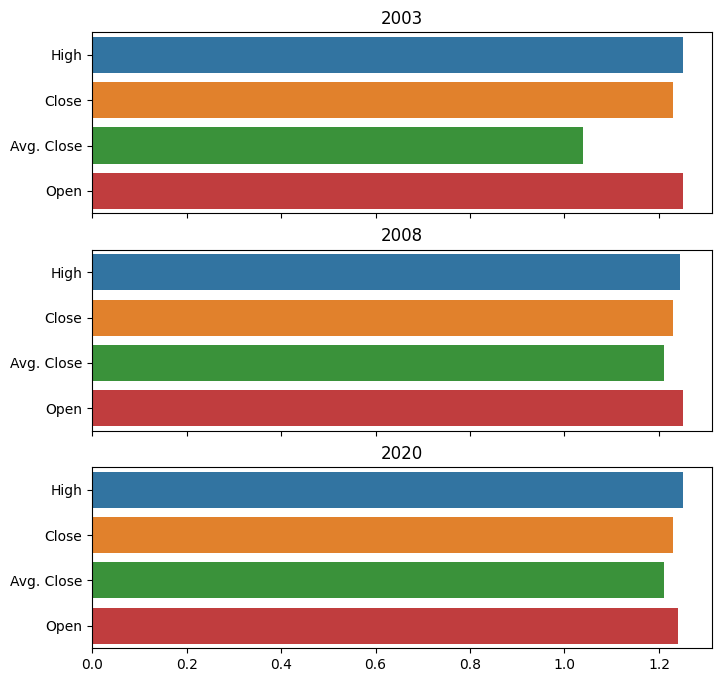

In [58]:
#June Month(2003, 2008, 2020)

import seaborn as sns

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 8))

#fig.suptitle('Important features contributing for September month')
axes[0].set_title('2003')
axes[1].set_title('2008')
axes[2].set_title('2020')

fig=sns.barplot(x = [1.25, 1.23, 1.04, 1.25],
            y = ['High', 'Close', 'Avg. Close', 'Open'], orient = 'h', ax=axes[0])

fig=sns.barplot(x = [1.244, 1.23, 1.21, 1.25],
            y = ['High', 'Close', 'Avg. Close', 'Open'], orient = 'h', ax=axes[1])

fig=sns.barplot(x = [1.25, 1.23, 1.21, 1.24],
            y = ['High', 'Close', 'Avg. Close', 'Open'], orient = 'h', ax=axes[2])

sns.set(font_scale=1.5)

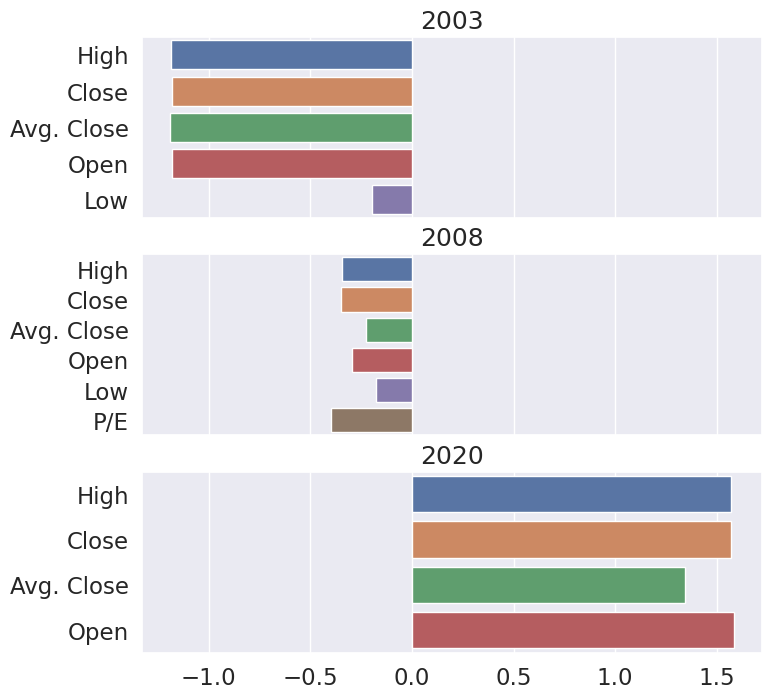

In [59]:
#August Month(2003, 2008, 2020)

import seaborn as sns

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 8))

#fig.suptitle('Important features contributing for September month')
axes[0].set_title('2003')
axes[1].set_title('2008')
axes[2].set_title('2020')

fig=sns.barplot(x = [-1.185, -1.183, -1.189, -1.183, -0.196],
            y = ['High', 'Close', 'Avg. Close', 'Open', 'Low'], orient = 'h', ax=axes[0])

fig=sns.barplot(x = [-0.345, -0.351, -0.226, -0.294, -0.176, -0.397],
            y = ['High', 'Close', 'Avg. Close', 'Open', 'Low', 'P/E'], orient = 'h', ax=axes[1])

fig=sns.barplot(x = [1.57, 1.57, 1.345, 1.585],
            y = ['High', 'Close', 'Avg. Close', 'Open'], orient = 'h', ax=axes[2])

sns.set(font_scale=1.5)

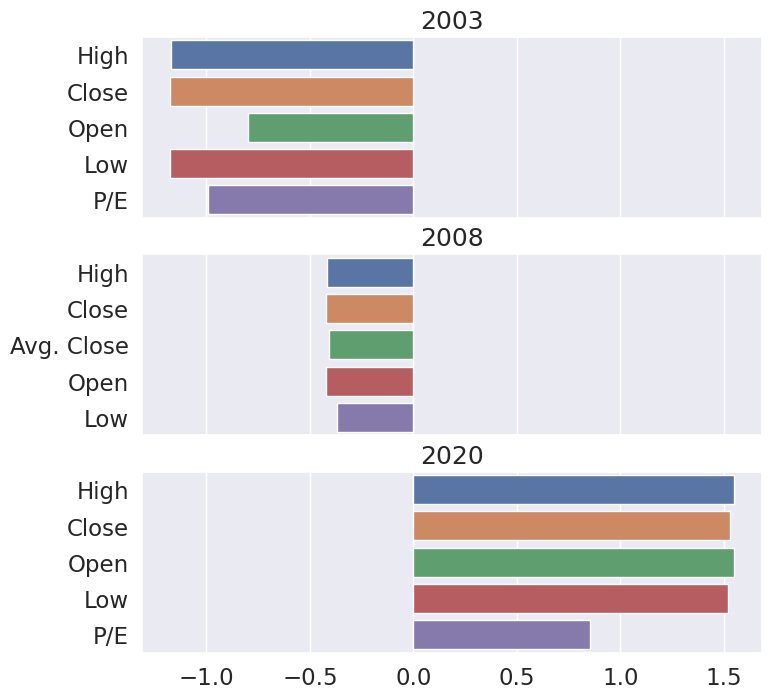

In [60]:
#September Month(2003, 2008, 2020)

import seaborn as sns

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 8))

#fig.suptitle('Important features contributing for September month')
axes[0].set_title('2003')
axes[1].set_title('2008')
axes[2].set_title('2020')

fig=sns.barplot(x = [-1.17, -1.174, -0.8, -1.174, -0.99],
            y = ['High', 'Close', 'Open', 'Low', 'P/E'], orient = 'h', ax=axes[0])

fig=sns.barplot(x = [-0.418, -0.42, -0.407, -0.42, -0.371],
            y = ['High', 'Close', 'Avg. Close', 'Open', 'Low'], orient = 'h', ax=axes[1])

fig=sns.barplot(x = [1.547, 1.529, 1.549, 1.519, 0.853],
            y = ['High', 'Close', 'Open', 'Low', 'P/E'], orient = 'h', ax=axes[2])

sns.set(font_scale=1.5)